In [1]:
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

# 데이터 불러오기

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["target"])
# target = 기준선 1년 후 질병 진행의 정량적 측정

In [5]:
#df = pd.concat([df_X, df_y], axis=1)
#df.tail()

In [6]:
print(type(df_X))
print(type(df_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# 학습 데이터, 테스트 데이터 분리하기

In [7]:
X = diabetes.data
y = diabetes.target
print(X.shape)
print(y.shape)
type(y)
print(y)

(442, 10)
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


# 모델 준비하기

W 10개, b 1개 생성하기

In [32]:
W = np.random.rand(10)
b = np.random.rand() 

In [33]:
W,b

(array([0.39469703, 0.27407452, 0.01353357, 0.204562  , 0.37020089,
        0.89522355, 0.36884049, 0.49906901, 0.65566355, 0.38063156]),
 0.430734242501175)

Loss=MSE=1/N*(i=1~N)∑(yi,true−yi,pred)2

In [34]:
def MSE(y, y_pred):
    mse = ((y - y_pred) ** 2).mean()
    return mse

In [35]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [36]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(y, predictions)
    return L

In [37]:
def gradient(X, W, b, y):
    # N은 데이터의 개수
    N = len(X)
    
    # y_pred
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [38]:
LEARNING_RATE = 0.1

In [39]:
dW, db = gradient(X_train, W, b, y_train)

print(dW.shape)
print(W.shape)


(10,)
(10,)


# 모델 학습하기

In [40]:
losses = []

for i in range(1, 40000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3443.8235
Iteration 2000 : Loss 3094.2235
Iteration 3000 : Loss 2979.0565
Iteration 4000 : Loss 2933.7337
Iteration 5000 : Loss 2914.6816
Iteration 6000 : Loss 2906.1537
Iteration 7000 : Loss 2902.0624
Iteration 8000 : Loss 2899.9403
Iteration 9000 : Loss 2898.7385
Iteration 10000 : Loss 2897.9885
Iteration 11000 : Loss 2897.4705
Iteration 12000 : Loss 2897.0764
Iteration 13000 : Loss 2896.7509
Iteration 14000 : Loss 2896.4647
Iteration 15000 : Loss 2896.2017
Iteration 16000 : Loss 2895.9529
Iteration 17000 : Loss 2895.7132
Iteration 18000 : Loss 2895.4797
Iteration 19000 : Loss 2895.2506
Iteration 20000 : Loss 2895.0249
Iteration 21000 : Loss 2894.8020
Iteration 22000 : Loss 2894.5816
Iteration 23000 : Loss 2894.3633
Iteration 24000 : Loss 2894.1471
Iteration 25000 : Loss 2893.9329
Iteration 26000 : Loss 2893.7206
Iteration 27000 : Loss 2893.5101
Iteration 28000 : Loss 2893.3015
Iteration 29000 : Loss 2893.0946
Iteration 30000 : Loss 2892.8895
Iteration 31000 : L

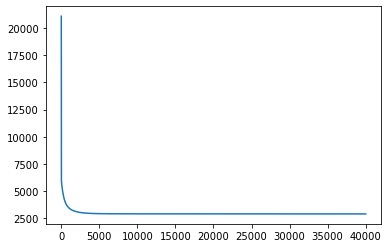

In [41]:
plt.plot(losses)
plt.show()

In [42]:
W, b

(array([  41.93353442, -240.31000244,  556.56988709,  343.07274245,
        -196.7050539 ,  -56.45324255, -168.4551852 ,  170.17624093,
         455.70022851,   53.9400354 ]),
 151.308058022222)

# test 데이터에 대한 성능 확인하기

In [43]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.6447571651456

# 정답 데이터와 예측 데이터 시각화하기

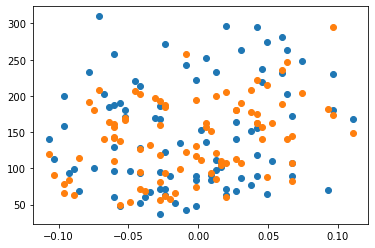

In [44]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 결과 및 총평

시간에 따른 당뇨병 진행도에 대한 데이터를 불러오고 분석해보았다.

회귀분석을 하기 위하여 손실함수, 기울기 함수등을 직접 정의하여 계산하였다.

학습률은 0.1보다 작은 수로 할 경우엔 학습이 잘 진행되지 않아, 0.1로 정의하였다.

W, b가 충분히 수렴 할때 까지 학습시켰고, test data에서 MSE 손실함수값 3000이하를  달성하였다.